# Analysis: the cosine switching function and resulting mixed model

## Alexandra Semposki

### Date: 28 July 2021

We want to test out different situations using the cosine switching function we built, as well as changing the priors and model expansions we are looking at. We begin by importing needed packages.

In [1]:
import numpy as np
from scipy import special, stats, integrate
import math as math
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

from class_expansions import Switching, Mixing

Our first test will be to change the mean of the prior drastically. 

In [2]:
#set up the linspaces we want
g_data = np.linspace(0.10, 0.20, 20)
g_true = np.linspace(1e-6, 0.5, 100)
g_ppd = np.linspace(1e-6, 0.5, 200)

#set the orders we want to mix
low = np.array([5])
high = np.array([23])

#load the object
test1 = Mixing()

Welcome to the BMM sandbox! Here you get to play!


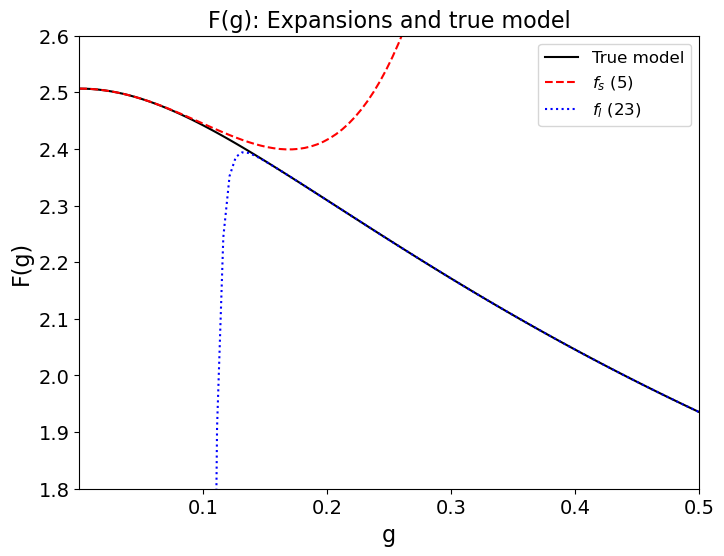

In [8]:
#plot the models we are using
test1.plot_models(g_true, low, high)

What percent error would you like on your data (please enter a decimal)?0.01


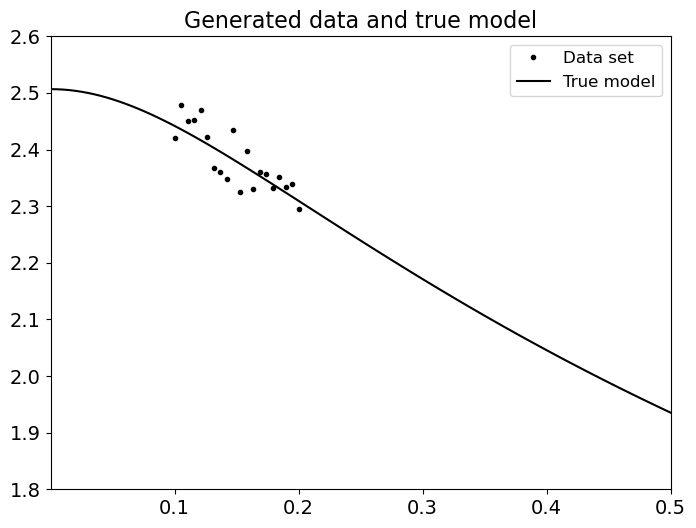

In [9]:
#generate some data and plot
data, sigma = test1.generate_data(g_true, g_data)

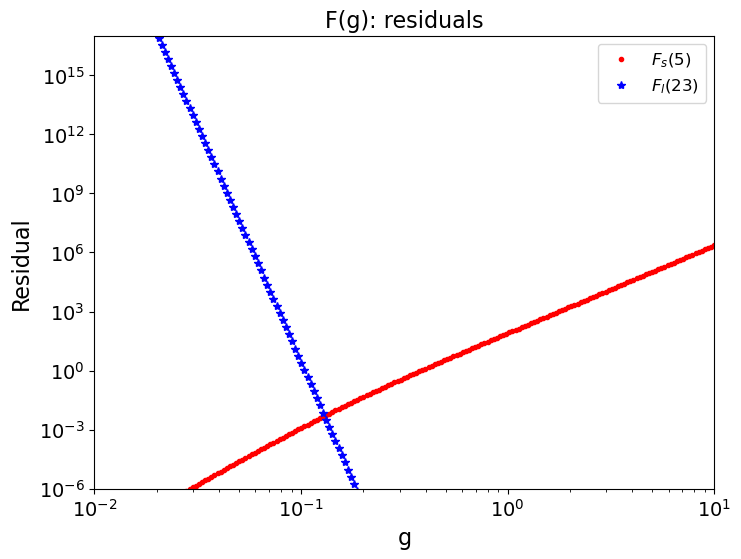

In [10]:
#check out the residuals
test1.residuals(low, high)

In [11]:
#calculate the mixed model using the cosine switching function
trace = test1.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.15
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 8 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.1401248161537416
Credible interval, g3: [0.12528546 0.15721394]


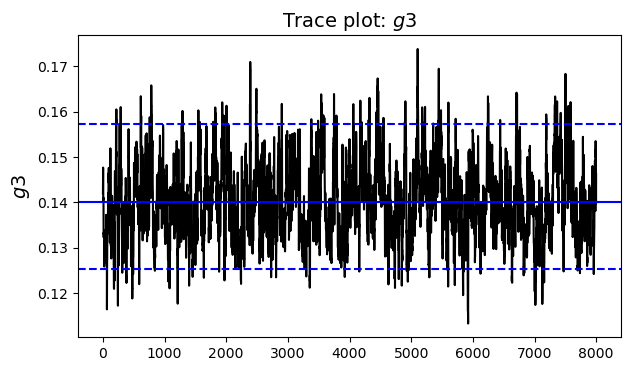

In [16]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test1.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

In [17]:
#calculate the ppd with intervals
switch_results_ppd = test1.ppd_cos(0.10, 0.20, trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test1.credible_intervals(switch_results_ppd[i,:], 0.95)

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


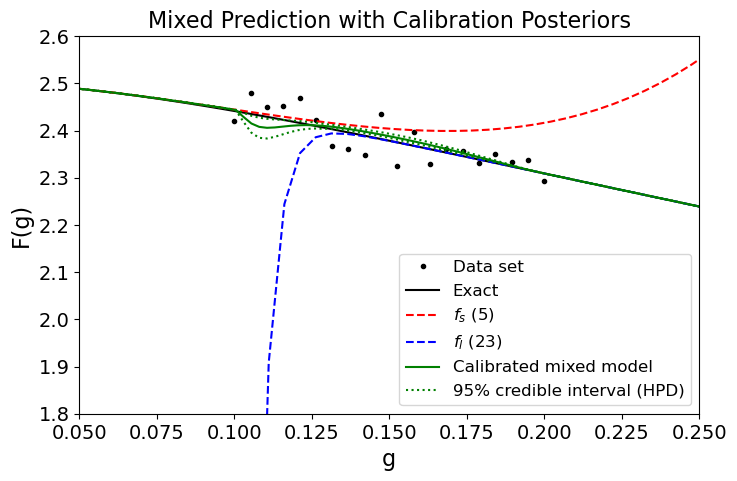

Would you like to save the plot to a file (yes/no)?no


In [18]:
#plot the ppd and intervals with the models and data
test1.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

In [19]:
#let's try another prior!
trace2 = test1.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.20
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 14 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.18040796566259018
Credible interval, g3: [0.16457583 0.19751679]


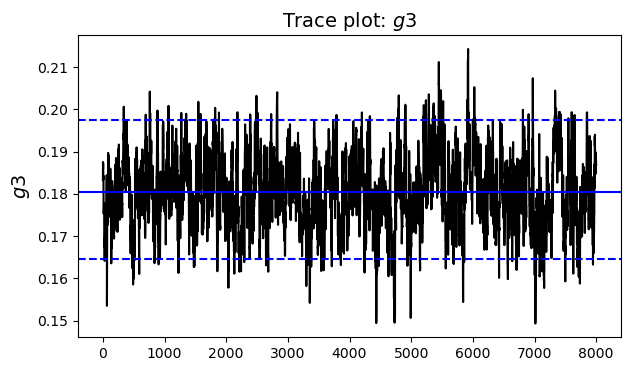

In [21]:
#print the mean of the trace
mean_g3 = np.mean(trace2.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test1.credible_intervals(trace2, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace2.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


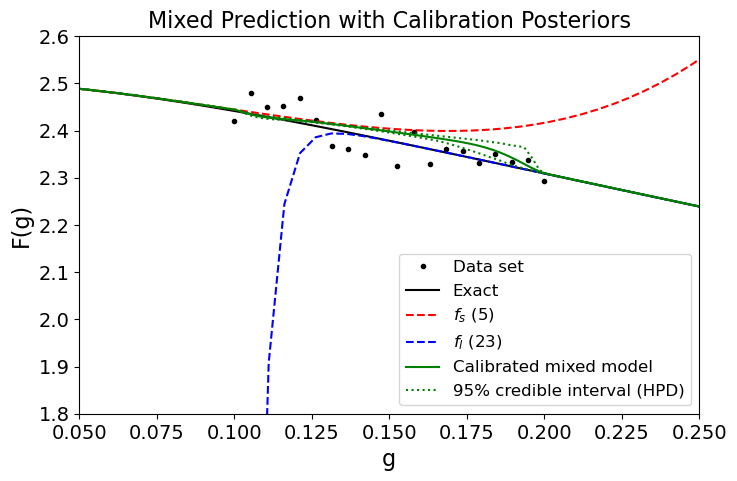

Would you like to save the plot to a file (yes/no)?no


In [22]:
#calculate the ppd with intervals
switch_results_ppd = test1.ppd_cos(0.10, 0.20, trace2, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test1.credible_intervals(switch_results_ppd[i,:], 0.95)
    
test1.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

In [23]:
#now let's try yet another prior
trace3 = test1.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.1
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 9 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.10248069272692047
Credible interval, g3: [0.16457583 0.19751679]


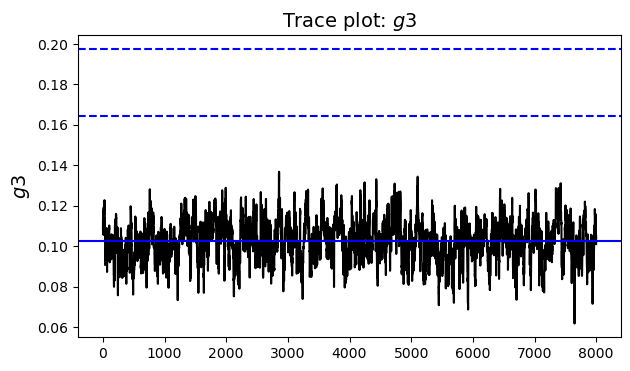

In [24]:
#print the mean of the trace
mean_g3 = np.mean(trace3.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test1.credible_intervals(trace3, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace3.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


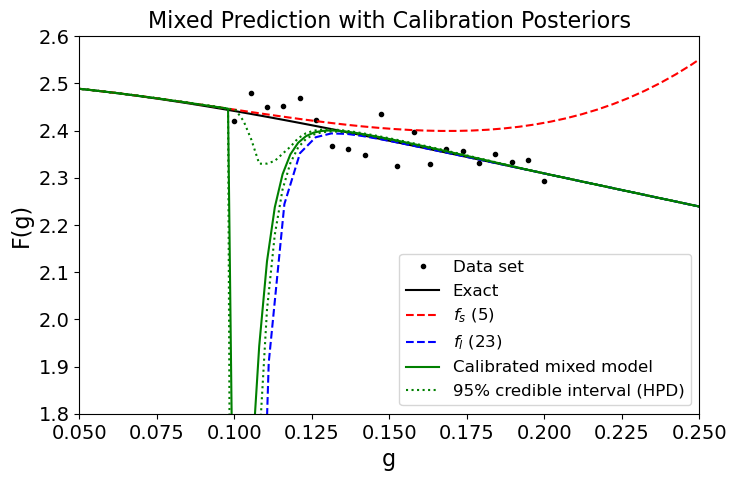

Would you like to save the plot to a file (yes/no)?no


In [25]:
#calculate the ppd with intervals
switch_results_ppd = test1.ppd_cos(0.10, 0.20, trace3, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test1.credible_intervals(switch_results_ppd[i,:], 0.95)
    
test1.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

From the above simple tests, it appears that a small variance and an extreme guess for the mean on the prior of g3 pulls the results around quite a lot. We'll test changing the variances now. 

__Outline of plans__:

- Change the mean of the Gaussian prior on g3
- Change the variance of the Gaussian prior on g3
- Change where the data is located, and the spacing of the data, as well as the error on the data points
- Alter the actual expansions being tested here (change them to different orders and see how well the mixing can adapt)
- Change the endpoint locations for g1 and g2 (make them sampled parameters as well)

Welcome to the BMM sandbox! Here you get to play!
What percent error would you like on your data (please enter a decimal)?0.01


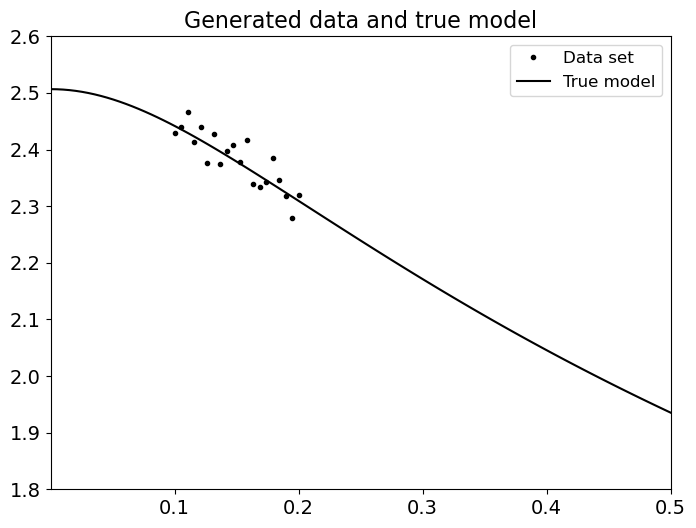

In [6]:
#now re-start with a new object and change variances
test2 = Mixing()

#make data
data, sigma = test2.generate_data(g_true, g_data)

In [7]:
trace = test2.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.15
Enter a guess for the standard deviation of the parameter g3: 0.1
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 18 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.11472840309491272
Credible interval, g3: [0.03063177 0.18798262]


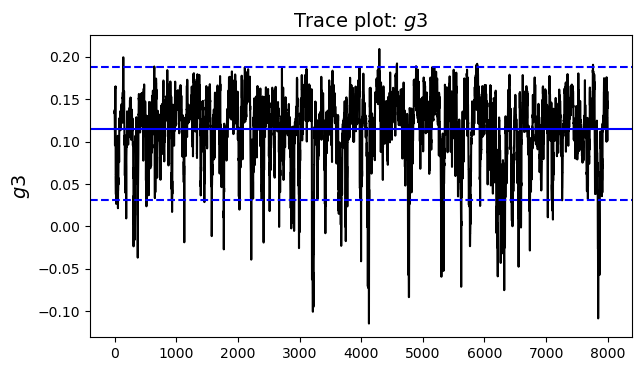

In [8]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test2.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.23


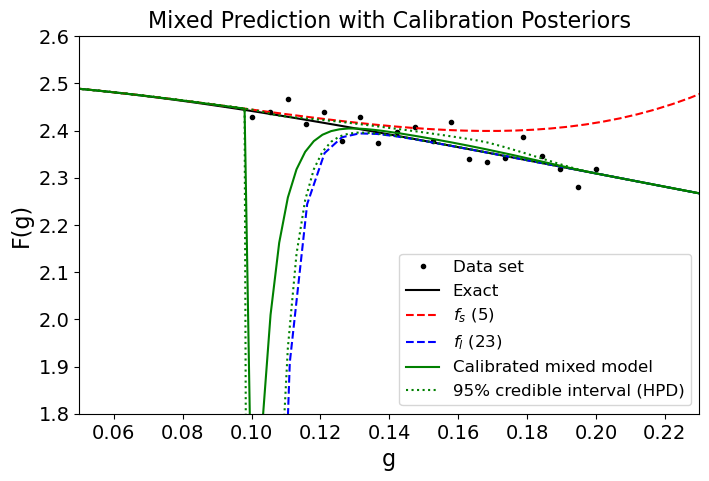

Would you like to save the plot to a file (yes/no)?no


In [10]:
#calculate the ppd with intervals
switch_results_ppd = test2.ppd_cos(0.10, 0.20, trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test2.credible_intervals(switch_results_ppd[i,:], 0.95)
    
test2.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

And, with a large variance, we see how quickly this doesn't obey what we wish anymore. Variance is the square of the standard deviation, so here the variance is 0.01. This means our variance for the situations with good results above is 0.0001. Quite small. It seems that we need a different prior, or a better way of working with this. Let's try 0.05 for the standard deviation and then look into different situations, just to give us food for thought.

In [11]:
trace2 = test2.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.16
Enter a guess for the standard deviation of the parameter g3: 0.05
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 16 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.13091089554977403
Credible interval, g3: [0.0804538  0.18054063]


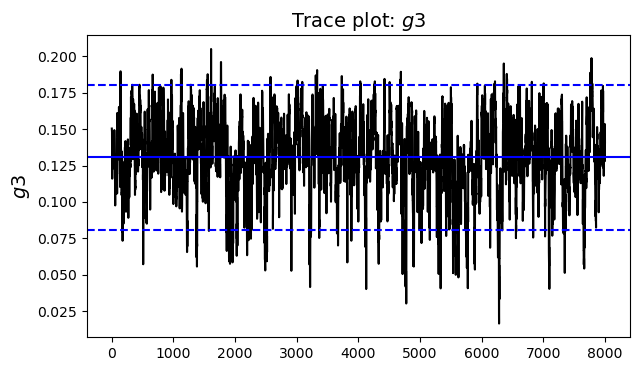

In [12]:
#print the mean of the trace
mean_g3 = np.mean(trace2.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test2.credible_intervals(trace2, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace2.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


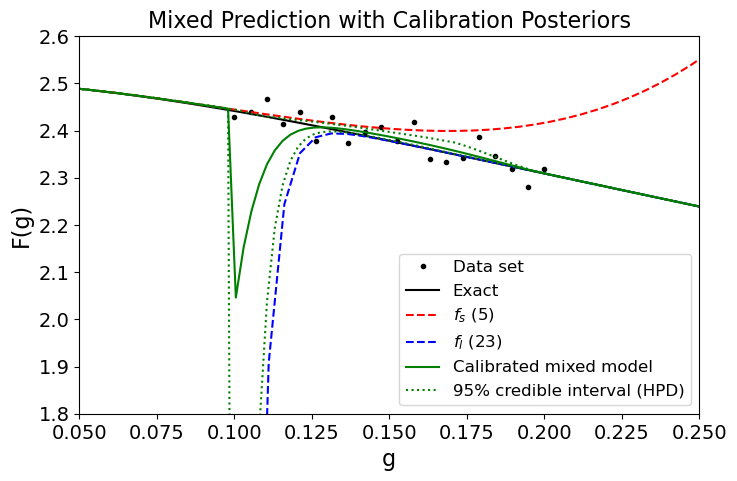

Would you like to save the plot to a file (yes/no)?no


In [13]:
#calculate the ppd with intervals
switch_results_ppd = test2.ppd_cos(0.10, 0.20, trace2, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test2.credible_intervals(switch_results_ppd[i,:], 0.95)
    
test2.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

If I am thinking about this correctly, the narrower I make my peak in the Gaussian prior, the better the results get. So, essentially, I could achieve "perfection" and get the line to match the true model on the left hand side there, but that would take a delta function. I still think that this prior does not seem a good choice for this parameter.

(And now for something completely different) let's look at a different set of functions!

In [14]:
test3 = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [37]:
g_data = np.linspace(0.1, 0.25, 20)
g_true = np.linspace(1e-6, 0.5, 100)

low = np.array([12])
high = np.array([11])

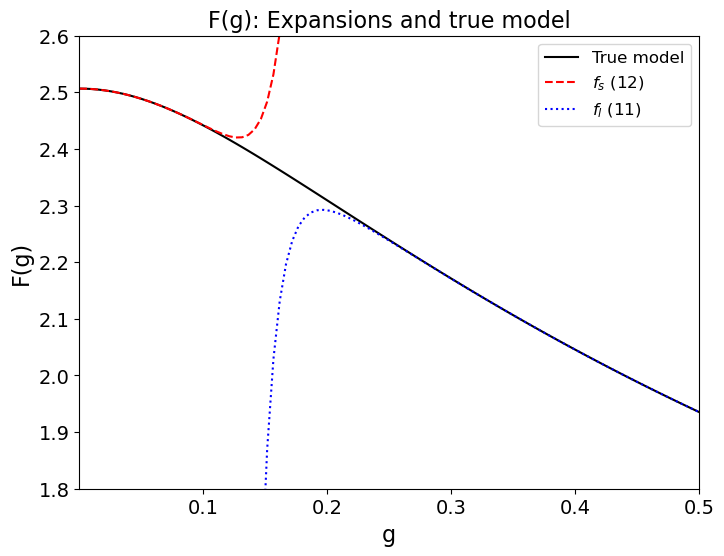

In [38]:
test3.plot_models(g_true, low, high)

These are a LOT farther apart at the center, so let's see how much damage is done when we use our Gaussian prior with mean 0.16 and standard deviation 0.01.

What percent error would you like on your data (please enter a decimal)?0.01


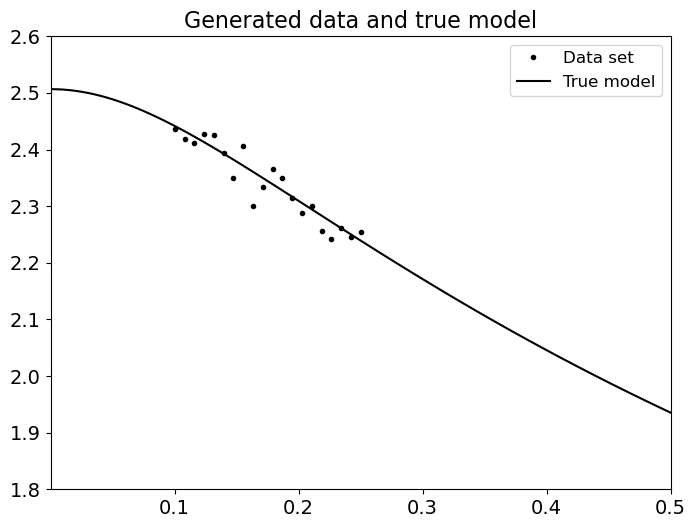

In [39]:
data, sigma = test3.generate_data(g_true, g_data)

In [40]:
trace = test3.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.16
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 3 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


Mean of g3: 0.15988606226982602
Credible interval, g3: [0.14541135 0.17410223]


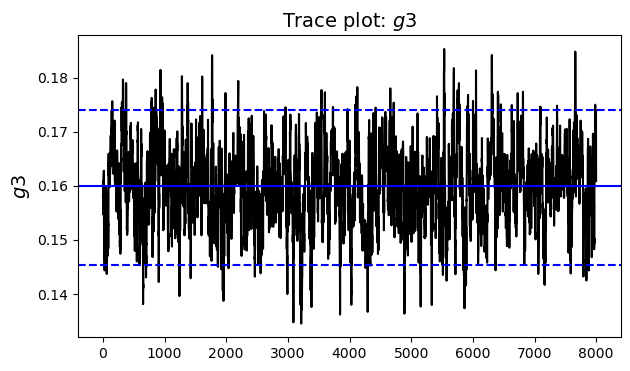

In [41]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = test3.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

plt.show()

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25


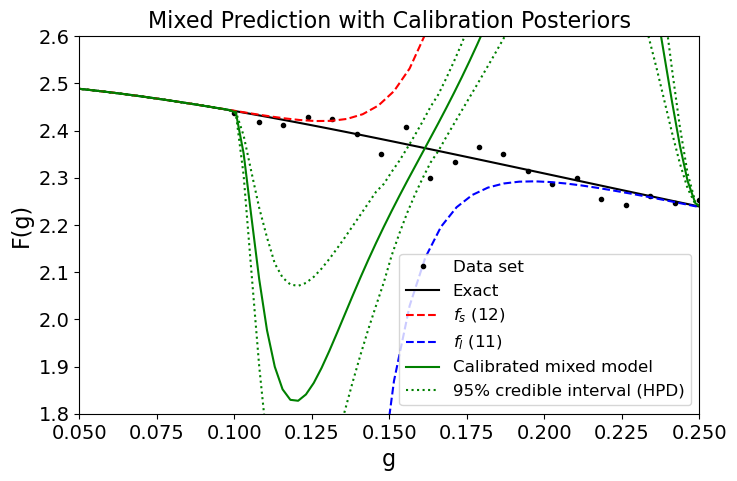

Would you like to save the plot to a file (yes/no)?no


In [43]:
#calculate the ppd with intervals
switch_results_ppd = test3.ppd_cos(0.10, 0.25, trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = test3.credible_intervals(switch_results_ppd[i,:], 0.95)
    
test3.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

Yikes. So that is what happens with these distributions so far, with this prior. We will concentrate on changing the prior next, to see what different results we can get. 